# Teste de nowcasting de registros de óbitos na base Hágape

**Autor: Paulo Inácio K. L. Prado**

## Introdução

Este notebook avalia o atraso de notificação de óbitos na base Hagape do Município de São Paulo, e compara os valores obseravdos com os obtidos com nowcasting usando o pacote [NobBS](https://github.com/sarahhbellum/NobBS).

Foram usados os registros de óbitos ocorridos em 2020, e nowcasting com janela móvel de 40 dias.

In [1]:
## Pacotes necessários
library(readxl)
library(ggplot2)
library(NobBS) ## nowcasting
library(dplyr)
library(repr)
# Change plot size
options(repr.plot.width=15, repr.plot.height=6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Leitura e processamento dos dados
Importa arquivo xlsx, converte os campos de data de óbito e de cadastro na base para formato de data e filtra óbitos ocorridos em 2020. Usa funções do pacote dplyr.

In [2]:
raw.2020 <- as.data.frame(read_xlsx("dados_teste_nowcasting.xlsx")) %>%
    mutate(dt_falecimento = as.Date(dt_falecimento),
           dt_cadastro = as.Date(dt_cadastro, "%Y-%m-%d %H:%M:%S"),
           delay = dt_cadastro - dt_falecimento) %>%
    filter(dt_falecimento >= as.Date("2020-01-01") & dt_falecimento <= Sys.Date())

Há  {{nrow(raw.2020) - nrow(teste)}} registros com data de cadastro anterior à data de óbito. Erros de digitação? Relação destes registros:

In [3]:
raw.2020 %>% filter(delay<0) %>%
    select(id_dados_obito:dt_cadastro) %>%
    as.data.frame()

id_dados_obito,dt_falecimento,dt_cadastro
<dbl>,<date>,<date>
18417,2020-01-01,2019-12-02
25270,2020-01-04,2020-01-03
25361,2020-01-04,2020-01-03
25389,2020-01-04,2020-01-03
25527,2020-01-05,2020-01-04
25853,2020-01-06,2020-01-05
26182,2020-01-08,2020-01-07
26390,2020-01-09,2020-01-08
26744,2020-01-11,2020-01-10


### Distribuição dos tempos de atraso
Número de óbitos registrados com zero, um ... n dias de atraso 

In [4]:
teste <- {{filter(raw.2020, delay>=0)}}
table(as.integer(teste$delay)) %>% as.data.frame()

Var1,Freq
<fct>,<int>
0,23154
1,13953
2,960
3,246
4,103
5,60
6,49
7,60
8,35


## Nowcasting
O comando abaixo executa o nowcasting, usando a data de óbito como data do evento (`onset_date`) e a data do cadastro na base como data do resgistro do evento (`report_date`). O número de óbitos corrigidos pelo atraso é estimado a cada dia, até o último dia de óbito regostrado na base. A correção é feita na janela dos últimos 40 dias.


In [5]:
teste.now <- NobBS( data = teste,
                   now = max(teste$dt_falecimento),
                   units = "1 day",
                   onset_date = "dt_falecimento",
                   report_date="dt_cadastro",
                   moving_window = 40)

Computing a nowcast for  2020-06-04

Warning message in jags.model(file = ifelse(specs[["dist"]] == "Poisson", JAGSmodPois, :
“Adaptation incomplete”


NOTE: Stopping adaptation




### Comparação entre óbitos previstos e observados

A linha preta mostra os óbitos estimados por nowcasting e a linha azul o observado. O último dia da base tem uma queda muito acentuada, que é em parte acompanhada pelo nowcasting. Este é um efeito conhecido do atraso no final da série, que mesmo com o nowcasting fica subestimada.

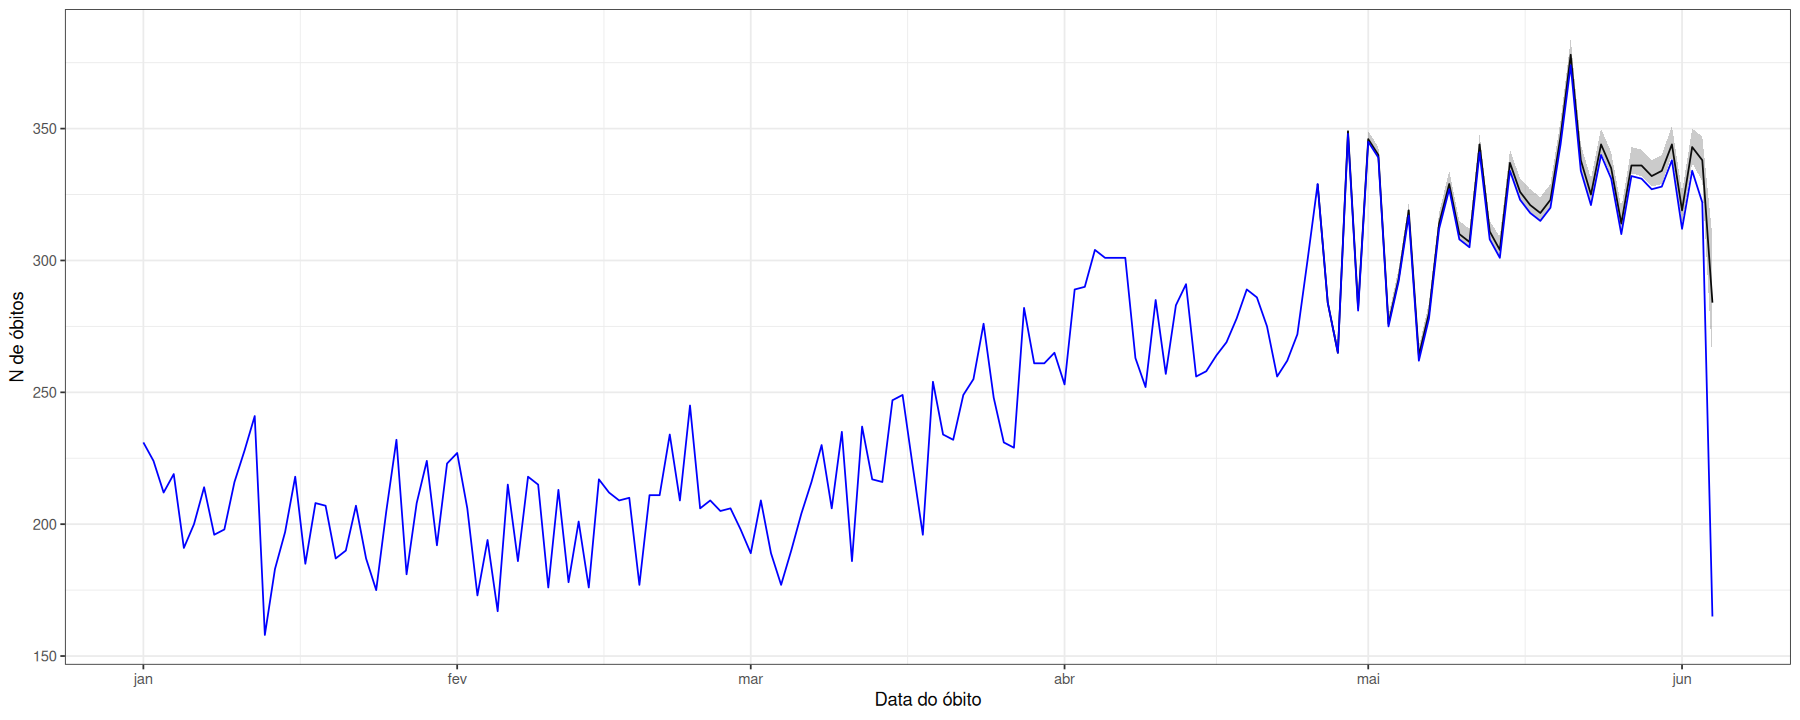

In [6]:
## Objeto com número observado de óbitos por data de óbito
n.obitos <- teste %>%
    group_by(dt_falecimento) %>%
    summarise(N = n()) %>%
    as.data.frame()
## Gráfico com n observado e estimado de óbitos
ggplot(teste.now$estimates, aes(onset_date, estimate)) +
    geom_line() +
    geom_ribbon(aes(ymin=lower, ymax=upper), alpha = 0.25) +
    geom_line(aes(dt_falecimento, N), data = n.obitos, col="blue") +
    xlab("Data do óbito") +
    ylab("N de óbitos") +
    theme_bw()

## Conclusões

* Atraso pequeno mas perceptível no cadastro de óbitos na base Hágape
* Estimar nowcasting até o penúltimo dia de óbito que consta na base. Desconsiderar valor do último dia.
